# Stock Market Prediction   (LSTM Model)

> Pranjal Kumar
    
        here we will be predicting Closing Prices

Hosted on:
[Streamlit](https://pranjal-barnwal-stock-market-predictor-app-l51dc4.streamlitapp.com)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#? to read data from Yahoo 
import pandas_datareader as data


In [41]:
# our TimeLine of data for consideration
start = '2010-01-01'
end = '2022-08-08'

# making our DataFrame
df = data.DataReader('AAPL', 'yahoo', start, end)    #following Stock's data will be fetched
#have hardcoded the Stock for now, but will make it dynamic later

df.head()         #just for testing
df.tail() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-02,162.410004,159.630005,160.100006,160.009995,59907000.0,159.788040
2022-08-03,166.589996,160.750000,160.839996,166.130005,82507500.0,165.899567
2022-08-04,167.190002,164.429993,166.009995,165.809998,55474100.0,165.580002
2022-08-05,165.850006,163.000000,163.210007,165.350006,56646600.0,165.350006
2022-08-08,167.809998,164.199997,166.369995,164.869995,60276900.0,164.869995


In [42]:
# removing Unnecessary Columns like Date, Adjacent Close to make our data light
# df = df.drop(['Date', 'Adj Close'], axis=1)        #⚠️ removing Date isn't working
df = df.drop(['Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0


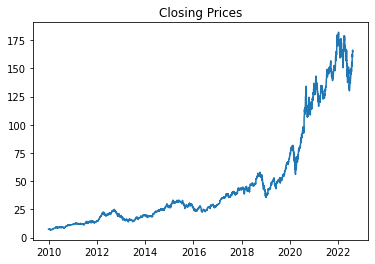

In [43]:
plt.title('Closing Prices')
plt.plot(df.Close)


## Moving Average: 100

In [44]:
# to find Moving Average of 100 days
ma100 = df.Close.rolling(100).mean()      
## for first 100-days, data will be NaN
## bcoz it utilizes last 100-days data
ma100

Date
2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2022-08-02    153.6745
2022-08-03    153.7506
2022-08-04    153.8614
2022-08-05    154.0087
2022-08-08    154.1065
Name: Close, Length: 3172, dtype: float64

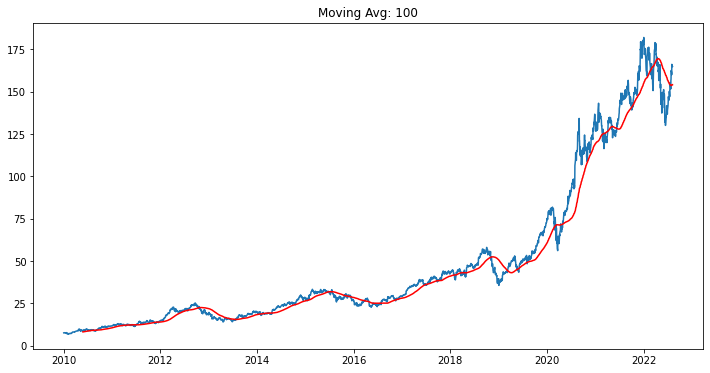

In [45]:
# to plot the data of MA100 to the Closing Price
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title('Moving Avg: 100')
plt.plot(ma100, 'r')

- Blue line represents the Closing Price for the Stock
- Red line represents the Moving Average of 100-days for the Stock

<br>

## Moving Average 200 

In [46]:
# to find Moving Average of 200 days
ma200 = df.Close.rolling(200).mean()      
## for first 200-days, data will be NaN
## bcoz it utilizes last 200-days data
ma200

Date
2009-12-31           NaN
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
                 ...    
2022-08-02    159.122950
2022-08-03    159.229400
2022-08-04    159.325700
2022-08-05    159.408651
2022-08-08    159.486701
Name: Close, Length: 3172, dtype: float64

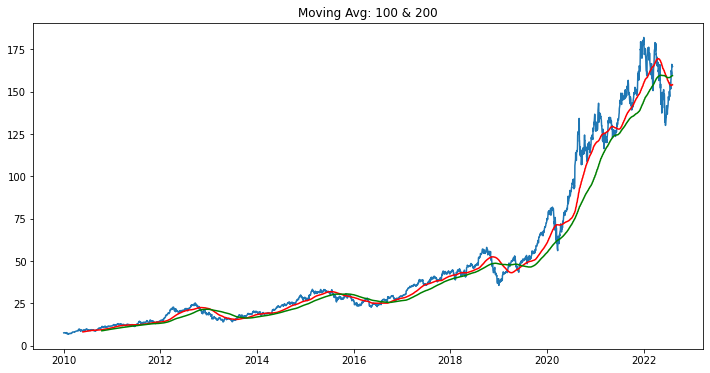

In [47]:
# to plot the data of MA200 to the Closing Price
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title('Moving Avg: 100 & 200')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [48]:
df.shape

(3172, 5)

### Splitting Data into Training & Testing

    here we are using 70% of Data to Train
    & rest 30% of Data to Test

In [49]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2220, 1)
(952, 1)


For the Stack LSTM Data, we can't use this data directly, we will scale the data b/w 0 & 1.
So, we import MinMaxScaler from Sklearn.preprocessing

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
data_training_array = scaler.fit_transform(data_training)      #converting data into Array
data_training_array
# data_training_array.shape

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.94419306],
       [0.95435754],
       [0.91702265]])

- for the First 100 days data will be my X_Train
- for the 101th day will be my Y_Train

In [52]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
# we need to convert it into Array for LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
x_train.shape

(2120, 100, 1)

## Making of ML Model

In [54]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

These are our 4-Layers in LSTM Model

In [55]:
model = Sequential()     #creating a Sequential Model
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
## in input shape first 1 describe the index (i.e. of Closing) 
## & the other 1 describes the no. of Column to be taken into consideration
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# here Dense is used to Connect all above 4 layers
model.add(Dense(units=1))

In [56]:
model.summary()        #gives summary about our Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [57]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
67/67 [==============================] - 30s 352ms/step - loss: 0.0265
Epoch 2/50
67/67 [==============================] - 20s 300ms/step - loss: 0.0055
Epoch 3/50
67/67 [==============================] - 19s 283ms/step - loss: 0.0045
Epoch 4/50
67/67 [==============================] - 19s 285ms/step - loss: 0.0047
Epoch 5/50
67/67 [==============================] - 22s 329ms/step - loss: 0.0046
Epoch 6/50
67/67 [==============================] - 19s 286ms/step - loss: 0.0042
Epoch 7/50
67/67 [==============================] - 23s 341ms/step - loss: 0.0034
Epoch 8/50
67/67 [==============================] - 25s 372ms/step - loss: 0.0033
Epoch 9/50
67/67 [==============================] - 24s 364ms/step - loss: 0.0033
Epoch 10/50
67/67 [==============================] - 25s 376ms/step - loss: 0.0038
Epoch 11/50
67/67 [==============================] - 23s 339ms/step - loss: 0.0034
Epoch 12/50
67/67 [==============================] - 21s 315ms/step - loss: 0.0030
Epoch 13/50
6

In [58]:
model.save('keras_model.h5')    #will save the model with given name

In [59]:
data_testing.head()

,Close
Date,
2018-10-25,54.950001
2018-10-26,54.075001
2018-10-29,53.060001
2018-10-30,53.325001
2018-10-31,54.715000


to solve for First element of Test Data, we need previous 100 data, which is a part of Training Data

In [60]:
past_100_days = data_training.tail(100)

In [61]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\itsel\AppData\Local\Temp\ipykernel_18456\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [62]:
final_df.head()

,Close
0,48.327499
1,48.494999
2,48.365002
3,47.924999
4,47.807499


In [63]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08725783],
       [0.08840146],
       [0.08751388],
       ...,
       [0.8893915 ],
       [0.88625082],
       [0.88297346]])

In [64]:
input_data.shape

(1052, 1)

In [65]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)
    
print(x_test.shape)
print(y_test.shape)

(952, 100, 1)
(952,)


## Making Predictions

In [67]:
y_predicted = model.predict(x_test)
y_predicted.shape

30/30 [==============================] - 6s 145ms/step


(952, 1)

In [68]:
y_test

array([0.13247419, 0.12649996, 0.11956987, 0.1213792 , 0.13086968,
       0.13660494, 0.1114449 , 0.10139113, 0.10511224, 0.115661  ,
       0.11316891, 0.10630708, 0.08872578, 0.08541435, 0.07614578,
       0.08401469, 0.08763335, 0.07454126, 0.05938379, 0.05904241,
       0.05137833, 0.05535546, 0.05470684, 0.06614321, 0.06377059,
       0.06211488, 0.07276608, 0.0588888 , 0.05552616, 0.04489204,
       0.04678673, 0.04513101, 0.04593327, 0.04909106, 0.03975419,
       0.03712555, 0.0407613 , 0.03191943, 0.02498933, 0.0145771 ,
       0.00792012, 0.02556968, 0.02382861, 0.02396517, 0.02654264,
       0.02684987, 0.        , 0.010361  , 0.00979771, 0.01461125,
       0.01898096, 0.01981736, 0.01723989, 0.01333105, 0.01857132,
       0.02176325, 0.02333362, 0.02497227, 0.0189639 , 0.02002218,
       0.01793974, 0.02657676, 0.02408467, 0.02131943, 0.03936161,
       0.04139285, 0.04152941, 0.04960314, 0.05460441, 0.05470684,
       0.049074  , 0.04816933, 0.04649653, 0.04898865, 0.04777

In [69]:
y_predicted

array([[0.20408288],
       [0.20360921],
       [0.20311932],
       [0.2025952 ],
       [0.20202394],
       [0.20142403],
       [0.20083979],
       [0.20024851],
       [0.19959594],
       [0.19883935],
       [0.19797656],
       [0.19701833],
       [0.19596922],
       [0.19480386],
       [0.19349492],
       [0.19201046],
       [0.19034854],
       [0.18853278],
       [0.18657666],
       [0.18447262],
       [0.18221855],
       [0.17981067],
       [0.17726332],
       [0.1746032 ],
       [0.17188397],
       [0.16916037],
       [0.1664793 ],
       [0.16390236],
       [0.16145432],
       [0.15913923],
       [0.15693693],
       [0.15482838],
       [0.15279737],
       [0.15083492],
       [0.1489437 ],
       [0.14711532],
       [0.14533752],
       [0.14360808],
       [0.14191672],
       [0.14024472],
       [0.13856357],
       [0.13684273],
       [0.13508964],
       [0.13332582],
       [0.1315758 ],
       [0.12986787],
       [0.1282283 ],
       [0.126

Since, we scaled down the values initially, we now need to Scale them up to use normally

In [70]:
scaler = scaler.scale_

In [71]:
scale_factor = 1/(scaler[0])
# scale_factor = 1/(0.00682769)
scale_factor

146.46249389648438

In [72]:
y_test = y_test * scale_factor
y_predicted = y_predicted * scale_factor

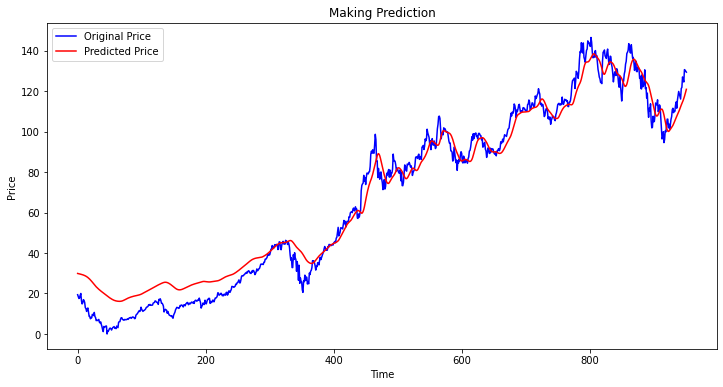

In [73]:
# Plotting the Data
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Making Prediction')
plt.legend()
plt.show()